<a href="https://colab.research.google.com/github/rkdus5485/Skyline_Operator/blob/main/Skyline_BNL_%EA%B0%80%EC%9A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skyline Operator BNL, BNL_sol, BNL_solrep

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun March 14 16:12:58 2021
@author: KGY
"""
import numpy as np
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt

## 함수 정의

### Dominate 함수

- dominate(record1, record2) == 1 : record1이 더 좋은것 !(record1이 record2를 dominate)
- dominate(record1, record2) == 2 : record2가 더 좋은것 !(record2가 record1을 dominate)
- dominate(record1, record2) == 0 : incomparable



In [3]:

def dominate (record1, record2):
  result0 = record1[0] - record2[0]
  result1 = record1[1] - record2[1]
  
  if result0<0 and result1<0:
    return 1
  if result0<0 and result1>0:
    return 0
  if result0<0 and result1==0:
    return 1
  if result0>0 and result1<0:
    return 0
  if result0>=0 and result1>=0:
    return 2
  if result0==0 and result1<0:
    return 1
  

  

### BNL basic

In [86]:
def BNL_basic (origin_database, w_size) :
    start_time = time.time()
    database = copy.copy(origin_database)
    w_size = w_size
    count =1
    window = []
    temp = []
    skylines = []
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
            # window가 비어있으면 database의 한개를 window에 넣어주기
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue

            # record_dominated 변수를 이용해 True라면
            # window 중 하나가 database를 dominate하여 database에서 하나가 제거되었으니
            # 다음 database를 비교                
            record_dominated = False

            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)

                # window의 target이 database의 record보다 좋을때
                if dominate(record, target) == 2 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True
                    # window의 target이 database의 record 보다 좋으므로
                    # 이 record는 더이상 다른 target들과 비교할 필요가 없으므로
                    # for문 나가기
                    break

                # database의 record가 window보다 좋을 때
                elif dominate(record, target) == 1 :
                    print('d=2 : remove from window is ', target)
                    # window의 target 지우기
                    window.remove(target)
                    # 이 record와 다음 target을 비교하기위해 위 for문으로 이동
                    continue

                # target과 record가 비교불가일때
                elif dominate(record, target) == 0 :
                    print('incomparable')
                    # 이 record와 다음 target을 비교하기 위해 위 for문으로 이동
                    continue
            
            # record_dominated == True이면
            # database에서 이 record가 지워졌으므로 다음 record 비교 시작
            if record_dominated :
                continue

            # 이번 record와 window의 모든 target들을 비교했는데
            # record가 database에서 지워지지 않았다면 이는 skyline
            # window에 자리가 남아 있다면 window에 record 넣기
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window)
            
            # window에 자리가 없다면 temp로 넣어두기
            else :
                temp.append(record)
                print('append : temp is', temp)
            
            database.remove(record)

        print('count는 ',count)
        
        # 2번째 iteration부터는 temp와 skyline 점들을 비교해야함
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for sky in list(skylines):
              # skyline의 점이 window의 target보다 더 좋을때
              if dominate(sky, target) == 1:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
              # window의 target이 skyline보다 좋을때
              elif dominate(sky, target) == 2:
                print('sky에서 뺄게~!')
                skylines.remove(sky)
        # skyline에 window의 원소들 붙이기
        # 여기서 dominate == 0인 것도 포함하여 붙여짐
        skylines = skylines + window
        print('skyline : ', skylines)
        count += 1
        # temp에 들어갔던 원소들을 database로 바꿔주기
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return [cost_time, skylines]

### BNL_sol

In [87]:
def BNL_sol (origin_database,w_size) :

    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    
    #window size가 작을때 (즉 skyline 개수보다 작을때) self_organizing list인지 확인이 잘 되지 않으나
    #window size가 클때 (즉 skyline 개수 보다 클때) self_organizing list인지 확인이 잘 됨
    
    w_size = w_size
    count =1
    window = []
    temp = []
    skylines = []
    trade = [] # window 순서 바꿀때 임시로 넣을 list
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
             # window가 비어있으면 database의 한개를 window에 넣어주기
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue

            # record_dominated 변수를 이용해 True라면
            # window 중 하나가 database를 dominate하여 database에서 하나가 제거되었으니
            # 다음 database를 비교                        
            record_dominated = False

            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)

                # window의 target이 database의 record보다 좋을때
                if dominate(record, target) == 2 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True

                    # self organizing
                    # window의 이번 target이 record를 제거했다면
                    # 이 target이 다른 record들을 제거할 확률도 높을 수 있음
                    # 따라서 이 target을 제일 먼저 record들과 비교하기위해
                    # window의 1번째 칸으로 올리기                   
                    
                    #print('trade 전 window : ', window)
                    trade.append(target)
                    #print('임시로 넣은 trade : ', trade)
                    window.remove(target)
                    window.insert(0,trade[0])
                    #print('자리 바꾼 후 window : ', window)
                    trade.clear()
                    #print('clear한 trade : ', trade)

                    
                    
                    # window의 target이 database의 record 보다 좋으므로
                    # 이 record는 더이상 다른 target들과 비교할 필요가 없으므로
                    # for문 나가기
                    break

                # database의 record가 window보다 좋을 때   
                elif dominate(record, target) == 1 :
                    print('d=2 : remove from window is ', target)
                    # window의 target 지우기
                    window.remove(target)
                    # 이 record와 다음 target을 비교하기위해 위 for문으로 이동
                    continue

                # target과 record가 비교불가일때    
                elif dominate(record, target) == 0 :
                    print('incomparable')
                    # 이 record와 다음 target을 비교하기 위해 위 for문으로 이동
                    continue
            
            # record_dominated == True이면
            # database에서 이 record가 지워졌으므로 다음 record 비교 시작
            if record_dominated :
                continue

            # 이번 record와 window의 모든 target들을 비교했는데
            # record가 database에서 지워지지 않았다면 이는 skyline
            # window에 자리가 남아 있다면 window에 record 넣기
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window
                      
            # window에 자리가 없다면 temp로 넣어두기
            else :
                temp.append(record)
                print('append : temp is', temp)
            database.remove(record)            
        
        print('count는 ',count)

        # 2번째 iteration부터는 temp와 skyline 점들을 비교해야함
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for sky in list(skylines):
              # skyline의 점이 window의 target보다 더 좋을때
              if dominate(sky, target) == 1:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
                  
              # window의 target이 skyline보다 좋을때
              elif dominate(sky, target) == 2:
                print('sky에서 뺄게~!')
                skylines.remove(sky)
        # skyline에 window의 원소들 붙이기
        # 여기서 dominate == 0인 것도 포함하여 붙여짐
        skylines = skylines + window
        count += 1
        print('skyline : ', skylines)
        # temp에 들어갔던 원소들을 database로 바꿔주기
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return [cost_time, skylines]

SyntaxError: ignored

### BNL_solrep

In [88]:
def BNL_solrep (origin_database,w_size) :

    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    
    #window size가 작을때 (즉 skyline 개수보다 작을때) self_organizing list인지 확인이 잘 되지 않으나
    #window size가 클때 (즉 skyline 개수 보다 클때) self_organizing list인지 확인이 잘 됨
    w_size = w_size
    count =1
    window = []
    temp = []
    skylines = []
    trade = [] # window 순서 바꿀때 임시로 넣을 list
    area = [] # price*distance 값 넣을 dictionary
    
    while database :
        print('\n')
        print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                print('append : window is ', window)
                database.remove(record)
                print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False
            for target in list(window) :
                print('\nthis turn record is ', record)
                print('this turn target is ', target)
                if dominate(record, target) == 2 :
                    print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True

                    # self organizing
                    #print('trade 전 window : ', window)
                    trade.append(target)
                    #print('임시로 넣은 trade : ', trade)
                    window.remove(target)
                    window.insert(0,trade[0])
                    #print('자리 바꾼 후 window : ', window)
                    trade.clear()
                    #print('clear한 trade : ', trade)

                    
                    
                    
                    break
                elif dominate(record, target) == 1 :
                    print('d=2 : remove from window is ', target)
                    window.remove(target)
                    
                    continue
                elif dominate(record, target) == 0 :
                    
                    print('incomparable')
                    print('this time window is : ', window)
                    
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
                print('append : window is ', window)
                
            else :
                for k in range(len(window)):
                  area.append(window[k][0]*window[k][1])
                area.append(record[0]*record[1])
                print('area : ', area)

                if max(area)==record[0]*record[1]:
                  print('record의 곱이 가장 크니 그냥 temp에 넣장')
                  temp.append(record)
                  print('이때 record는 ? : ', record)
                  print('지금 window : ',window)
                  print('지금 temp : ', temp)
                  area.clear()
                else :
                  print('window에서 record 곱보다 큰게 나왔다!')
                  max_index=area.index(max(area))
                  print('바뀔 친구는 : ', window[max_index])
                  temp.append(window[max_index])
                  print('temp에 넣기 : ', temp)
                  window.remove(window[max_index])
                  print('제일 큰 애 window에서 뺀 후 : ', window)
                  window.append(record)
                  print('record를 window에 넣은 후 window : ', window)
                  area.clear()
            database.remove(record)            
        
        print('count는 ',count)
        if count != 1 :
          for target in list(window):
            print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 1:
                if len(window)!= 0 :
                  print('지금 window는 : ', window)
                  print('지금 target은 :', target)

                  window.remove(target)
                  print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 2:
                print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        count += 1
        print('skyline : ', skylines)
        database = database + temp
        print('database : ', database)
        temp.clear()
        print('temp clear 후 database : ', database)
        window.clear()
    cost_time = time.time() - start_time
    print('window: ',window)
    print('skylines : ',skylines)
    print('database: ',database)
    return [cost_time, skylines]

## skyline인 점들을 빨간색으로 찍기 위한 plot

In [89]:
def plot_sky(result_1, origin_database):
  print("skyline",result_1[1])

  for record in origin_database:
    plt.scatter(record[0],record[1],c="blue")
    
  for rrr in result_1[1]:
    plt.scatter(rrr[0],rrr[1],c="red") 
  print("time:",result_1[0])

## 사용할 데이터를 uniform, randint로 500개 뽑기

In [139]:
import random
origin_database_uni=[]
num=1000
for i in range(num):
  a=[random.uniform(0.00,100.00) for r in range(2)]
  c=[round(a[0],2),round(a[1],2)]
  origin_database_uni.append(c)

In [117]:
import random
origin_database_ran=[]
num=1000
for i in range(num):
  a=[random.randint(0,100) for r in range(2)]
  c=[a[0],a[1]]
  origin_database_ran.append(c)

## 결과

### unifrom 결과 (BNL_basic, BNL_sol, BNL_solrep)

In [140]:
result_BNL_uni = BNL_basic(origin_database_uni,3)
result_BNL_uni



1 번째 iteration
append : window is  [[19.11, 59.28]]
remove from database is  [19.11, 59.28]

this turn record is  [43.78, 5.91]
this turn target is  [19.11, 59.28]
incomparable
append : window is  [[19.11, 59.28], [43.78, 5.91]]

this turn record is  [49.73, 67.26]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [49.73, 67.26]

this turn record is  [21.23, 57.91]
this turn target is  [19.11, 59.28]
incomparable

this turn record is  [21.23, 57.91]
this turn target is  [43.78, 5.91]
incomparable
append : window is  [[19.11, 59.28], [43.78, 5.91], [21.23, 57.91]]

this turn record is  [51.68, 93.76]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [51.68, 93.76]

this turn record is  [60.73, 77.03]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [60.73, 77.03]

this turn record is  [89.49, 21.52]
this turn target is  [19.11, 59.28]
incomparable

this turn record is  [89.49, 21.52]
this turn target is  [43.78, 5.91]
d=1 : remove fr

[0.676002025604248,
 [[0.86, 0.8],
  [3.55, 0.58],
  [50.81, 0.18],
  [0.17, 87.8],
  [0.56, 44.46],
  [44.21, 0.41]]]

In [141]:
result_BNL_sol_uni = BNL_sol(origin_database_uni,3)
result_BNL_sol_uni



1 번째 iteration
append : window is  [[19.11, 59.28]]
remove from database is  [19.11, 59.28]

this turn record is  [43.78, 5.91]
this turn target is  [19.11, 59.28]
incomparable
append : window is  [[19.11, 59.28], [43.78, 5.91]]

this turn record is  [49.73, 67.26]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [49.73, 67.26]

this turn record is  [21.23, 57.91]
this turn target is  [19.11, 59.28]
incomparable

this turn record is  [21.23, 57.91]
this turn target is  [43.78, 5.91]
incomparable
append : window is  [[19.11, 59.28], [43.78, 5.91], [21.23, 57.91]]

this turn record is  [51.68, 93.76]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [51.68, 93.76]

this turn record is  [60.73, 77.03]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [60.73, 77.03]

this turn record is  [89.49, 21.52]
this turn target is  [19.11, 59.28]
incomparable

this turn record is  [89.49, 21.52]
this turn target is  [43.78, 5.91]
d=1 : remove fr

[0.6637265682220459,
 [[0.86, 0.8],
  [50.81, 0.18],
  [3.55, 0.58],
  [0.17, 87.8],
  [0.56, 44.46],
  [44.21, 0.41]]]

In [142]:
result_BNL_solrep_uni = BNL_solrep(origin_database_uni,3)
result_BNL_solrep_uni



1 번째 iteration
append : window is  [[19.11, 59.28]]
remove from database is  [19.11, 59.28]

this turn record is  [43.78, 5.91]
this turn target is  [19.11, 59.28]
incomparable
this time window is :  [[19.11, 59.28]]
append : window is  [[19.11, 59.28], [43.78, 5.91]]

this turn record is  [49.73, 67.26]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [49.73, 67.26]

this turn record is  [21.23, 57.91]
this turn target is  [19.11, 59.28]
incomparable
this time window is :  [[19.11, 59.28], [43.78, 5.91]]

this turn record is  [21.23, 57.91]
this turn target is  [43.78, 5.91]
incomparable
this time window is :  [[19.11, 59.28], [43.78, 5.91]]
append : window is  [[19.11, 59.28], [43.78, 5.91], [21.23, 57.91]]

this turn record is  [51.68, 93.76]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [51.68, 93.76]

this turn record is  [60.73, 77.03]
this turn target is  [19.11, 59.28]
d=1 : remove from database is  [60.73, 77.03]

this turn record is  [

[0.8478672504425049,
 [[0.86, 0.8],
  [50.81, 0.18],
  [3.55, 0.58],
  [0.56, 44.46],
  [0.17, 87.8],
  [44.21, 0.41]]]

### randint(정수) 결과 (BNL_basic, BNL_sol, BNL_solrep)

In [121]:
result_BNL_ran = BNL_basic(origin_database_ran,3)
result_BNL_ran



1 번째 iteration
append : window is  [[11, 43]]
remove from database is  [11, 43]

this turn record is  [47, 64]
this turn target is  [11, 43]
d=1 : remove from database is  [47, 64]

this turn record is  [13, 63]
this turn target is  [11, 43]
d=1 : remove from database is  [13, 63]

this turn record is  [100, 6]
this turn target is  [11, 43]
incomparable
append : window is  [[11, 43], [100, 6]]

this turn record is  [95, 31]
this turn target is  [11, 43]
incomparable

this turn record is  [95, 31]
this turn target is  [100, 6]
incomparable
append : window is  [[11, 43], [100, 6], [95, 31]]

this turn record is  [63, 29]
this turn target is  [11, 43]
incomparable

this turn record is  [63, 29]
this turn target is  [100, 6]
incomparable

this turn record is  [63, 29]
this turn target is  [95, 31]
d=2 : remove from window is  [95, 31]
append : window is  [[11, 43], [100, 6], [63, 29]]

this turn record is  [68, 42]
this turn target is  [11, 43]
incomparable

this turn record is  [68, 42]

[0.740938663482666, [[1, 12], [6, 0], [3, 2], [2, 8], [0, 19]]]

In [122]:
result_BNL_sol_ran = BNL_sol(origin_database_ran,3)
result_BNL_sol_ran



1 번째 iteration
append : window is  [[11, 43]]
remove from database is  [11, 43]

this turn record is  [47, 64]
this turn target is  [11, 43]
d=1 : remove from database is  [47, 64]

this turn record is  [13, 63]
this turn target is  [11, 43]
d=1 : remove from database is  [13, 63]

this turn record is  [100, 6]
this turn target is  [11, 43]
incomparable
append : window is  [[11, 43], [100, 6]]

this turn record is  [95, 31]
this turn target is  [11, 43]
incomparable

this turn record is  [95, 31]
this turn target is  [100, 6]
incomparable
append : window is  [[11, 43], [100, 6], [95, 31]]

this turn record is  [63, 29]
this turn target is  [11, 43]
incomparable

this turn record is  [63, 29]
this turn target is  [100, 6]
incomparable

this turn record is  [63, 29]
this turn target is  [95, 31]
d=2 : remove from window is  [95, 31]
append : window is  [[11, 43], [100, 6], [63, 29]]

this turn record is  [68, 42]
this turn target is  [11, 43]
incomparable

this turn record is  [68, 42]

[0.6957988739013672, [[6, 0], [1, 12], [3, 2], [0, 19], [2, 8]]]

In [123]:
result_BNL_solrep_ran = BNL_sol(origin_database_ran,3)
result_BNL_solrep_ran



1 번째 iteration
append : window is  [[11, 43]]
remove from database is  [11, 43]

this turn record is  [47, 64]
this turn target is  [11, 43]
d=1 : remove from database is  [47, 64]

this turn record is  [13, 63]
this turn target is  [11, 43]
d=1 : remove from database is  [13, 63]

this turn record is  [100, 6]
this turn target is  [11, 43]
incomparable
append : window is  [[11, 43], [100, 6]]

this turn record is  [95, 31]
this turn target is  [11, 43]
incomparable

this turn record is  [95, 31]
this turn target is  [100, 6]
incomparable
append : window is  [[11, 43], [100, 6], [95, 31]]

this turn record is  [63, 29]
this turn target is  [11, 43]
incomparable

this turn record is  [63, 29]
this turn target is  [100, 6]
incomparable

this turn record is  [63, 29]
this turn target is  [95, 31]
d=2 : remove from window is  [95, 31]
append : window is  [[11, 43], [100, 6], [63, 29]]

this turn record is  [68, 42]
this turn target is  [11, 43]
incomparable

this turn record is  [68, 42]

[0.7922861576080322, [[6, 0], [1, 12], [3, 2], [0, 19], [2, 8]]]

### 각 결과를 plot_sky로 그래프 출력

skyline [[0.86, 0.8], [3.55, 0.58], [50.81, 0.18], [0.17, 87.8], [0.56, 44.46], [44.21, 0.41]]
time: 0.676002025604248


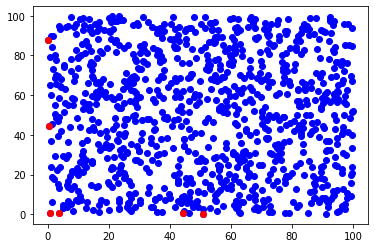

In [143]:
plot_sky(result_BNL_uni, origin_database_uni)

skyline [[0.86, 0.8], [50.81, 0.18], [3.55, 0.58], [0.17, 87.8], [0.56, 44.46], [44.21, 0.41]]
time: 0.6637265682220459


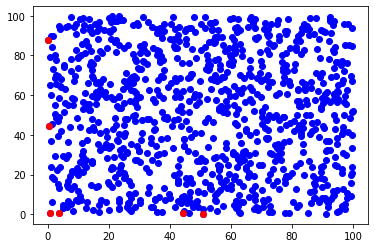

In [144]:
plot_sky(result_BNL_sol_uni, origin_database_uni)

skyline [[0.86, 0.8], [50.81, 0.18], [3.55, 0.58], [0.56, 44.46], [0.17, 87.8], [44.21, 0.41]]
time: 0.8478672504425049


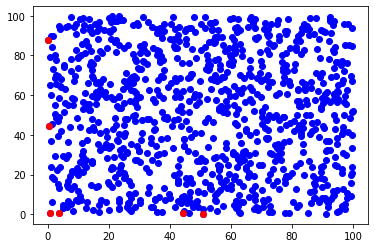

In [145]:
plot_sky(result_BNL_solrep_uni, origin_database_uni)

skyline [[1, 12], [6, 0], [3, 2], [2, 8], [0, 19]]
time: 0.740938663482666


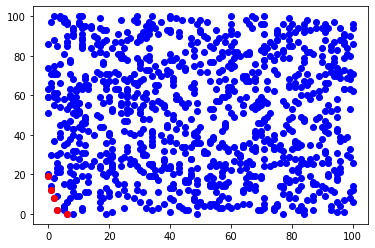

In [127]:
plot_sky(result_BNL_ran, origin_database_ran)

skyline [[6, 0], [1, 12], [3, 2], [0, 19], [2, 8]]
time: 0.6957988739013672


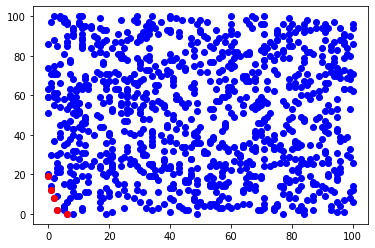

In [128]:
plot_sky(result_BNL_sol_ran, origin_database_ran)

skyline [[6, 0], [1, 12], [3, 2], [0, 19], [2, 8]]
time: 0.7922861576080322


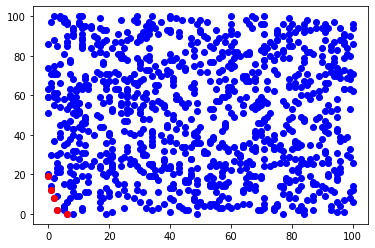

In [129]:
plot_sky(result_BNL_solrep_ran, origin_database_ran)

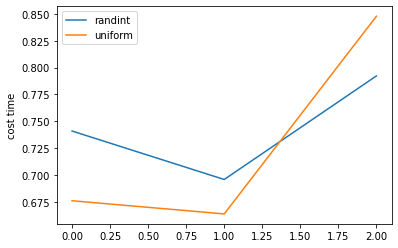

In [146]:
uniform = [result_BNL_uni[0], result_BNL_sol_uni[0], result_BNL_solrep_uni[0]]
randint = [result_BNL_ran[0], result_BNL_sol_ran[0],result_BNL_solrep_ran[0]]

plt.plot(randint)
plt.plot(uniform)
plt.legend(['randint', 'uniform'])
plt.ylabel('cost time')
plt.show()